<a href="https://colab.research.google.com/github/sujeet311/qsvm/blob/main/pQSVc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.7 MB 11.3 MB/s 
     |████████████████████████████████| 18.0 MB 229 kB/s 
     |████████████████████████████████| 240 kB 40.2 MB/s 
     |████████████████████████████████| 112 kB 45.9 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 943 kB 46.9 MB/s 
     |████████████████████████████████| 49 kB 3.8 MB/s 
     |████████████████████████████████| 37.5 MB 62.0 MB/s 
     |████████████████████████████████| 1.6 MB 33.4 MB/s 
     |████████████████████████████████| 49 kB 5.7 MB/s 
     |████████████████████████████████| 4.1 MB 46.6 MB/s 
     |████████████████████████████████| 112 kB 51.4 MB/s 
  Created wheel for qiskit: filename=qiskit-0.37.0-py3-none-any.whl size=12028 sha256=23aeceaba9fe8d459f7ffde1b3b11ef7c08f97507dc92df01573404f4dd0f695
  Stored in directory: /root/.cache/pip/wheels/ed/f9/fa/3ed

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install qiskit_machine_learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 126 kB 7.6 MB/s 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import BasicAer
from qiskit.circuit.library import ZZFeatureMap
#from dataset_helper import split_dataset_to_data_and_labels, map_label_to_class_name
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import QuantumKernel
import time

In [ ]:
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *


pip install qiskit-ibmq-provider

In [ ]:
IBMQ.save_account('3e4aade17521ec826605c890d09ce72429f10032c57d8b62fb4331f7a19e3e079b8e682246e31be652f81a4f69aa2db520ef01af3f9a4bec168fda792000cb15',overwrite=True)
provider = IBMQ.load_account()

In [ ]:
from numpy import loadtxt
X_train = loadtxt('/content/drive/MyDrive/code thesis/train_test/X_train.csv',delimiter=',')
y_train = loadtxt('/content/drive/MyDrive/code thesis/train_test/y_train.csv',delimiter=',')
X_test = loadtxt('/content/drive/MyDrive/code thesis/train_test/X_test.csv',delimiter=',')
y_test = loadtxt('/content/drive/MyDrive/code thesis/train_test/y_test.csv',delimiter=',')

In [ ]:
# I scale the data to fit it to a normal distribution
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA

n_dim = 2
# I use PCA to reduce the number of dimensions of the dataset down to n_dim = 2
pca = PCA(n_components=n_dim).fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)


In [ ]:
 # I scale the data between -1 and 1
from sklearn.preprocessing import  MinMaxScaler

samples = np.append(X_train, X_test, axis=0)
minmax_scale = MinMaxScaler((-1, 1)).fit(samples)
X_train = minmax_scale.transform(X_train)
X_test = minmax_scale.transform(X_test)


In [ ]:
class_labels = ['Non-Dibetic', 'Dibetic']


In [ ]:
print(len(X_train),len(X_test))

def select_training_test_size(training_size=None, test_size=None):

    if not training_size==None:
        # I restrict the training data and test data
        training_input = {key: (X_train[y_train == k, :])[:training_size]
                          for k, key in enumerate(class_labels)}
        test_input = {key: (X_test[y_test == k, :])[:test_size]
                      for k, key in enumerate(class_labels)}

    else:
        # I keep the whole dataset
        training_input = {key: (X_train[y_train == k, :])
                          for k, key in enumerate(class_labels)}
        test_input = {key: (X_test[y_test == k, :])
                      for k, key in enumerate(class_labels)}
    return training_input, test_input

training_input, test_input = select_training_test_size()
count, count2 = 0, 0
for l in training_input.values():
    count+=len(l)
for l in test_input.values():
    count2+=len(l)
print(count, count2, count+count2)

272127 116627
272127 116627 388754


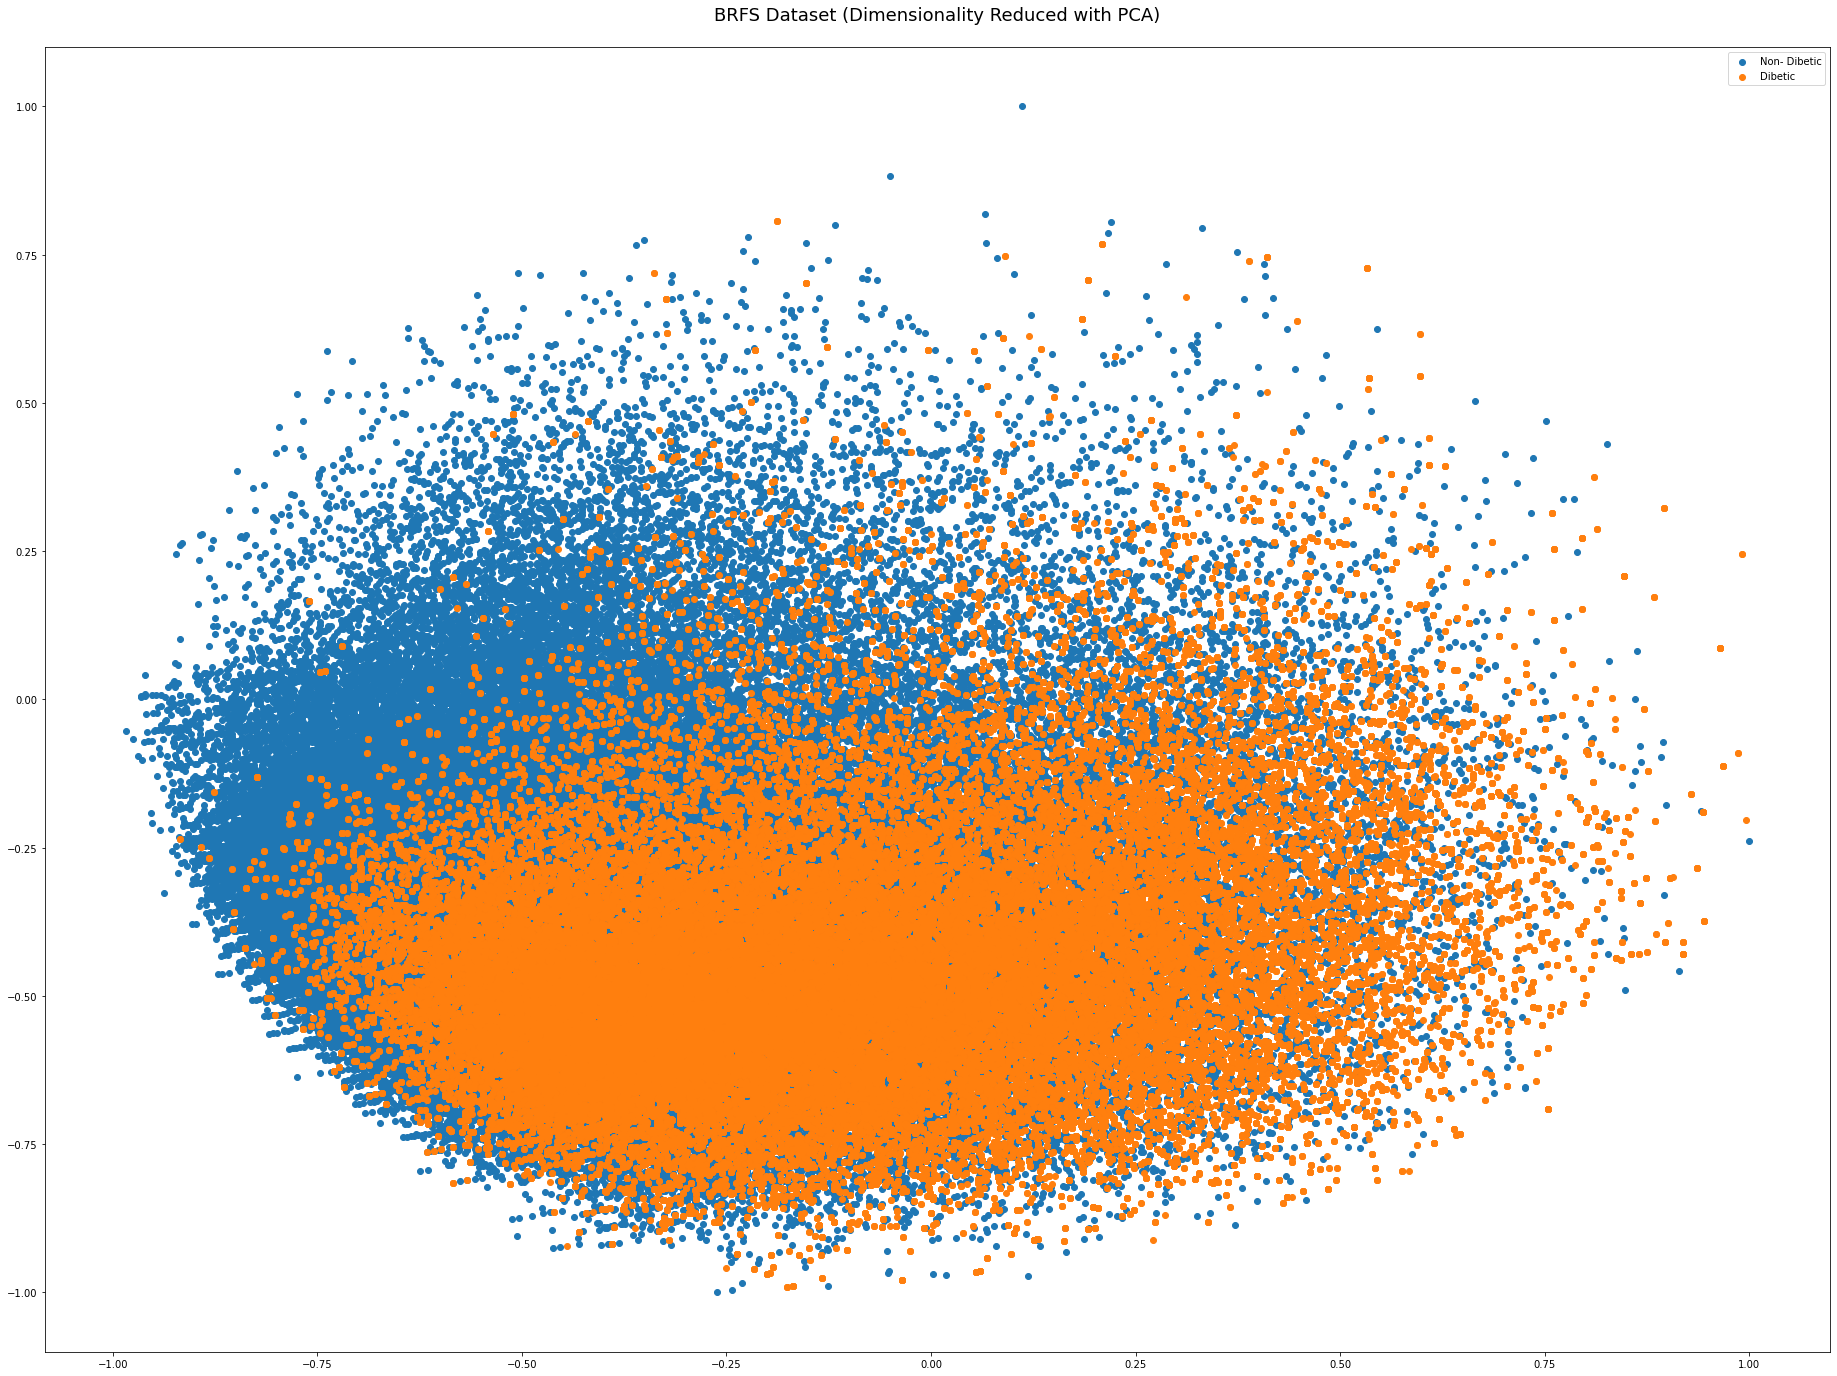

In [ ]:
# I plot the 2D representation of the data, reduced in dimensionality using PCA
plt.figure(figsize=(32, 24))
for k in range(0, 2):
    x_axis_data = X_train[y_train == k, 0][:len(X_train)]
    y_axis_data = X_train[y_train == k, 1][:len(X_train)]
    if k is 1:
        label = 'Dibetic'
    else:
        label = 'Non- Dibetic'
    plt.scatter(x_axis_data, y_axis_data, label=label)
plt.title("BRFS Dataset (Dimensionality Reduced with PCA)\n",
          fontdict = {'fontsize': 18})
plt.legend()
plt.savefig("plot2.png")
plt.show()

In [ ]:
# number of qubits is equal to the number of features
num_qubits = 2

# number of steps performed during the training procedure
tau = 25 #50

# regularization parameter
#C = 350
C= 450



In [ ]:
from qiskit import BasicAer
from qiskit.circuit.library import ZFeatureMap
from qiskit.utils import QuantumInstance, algorithm_globals
algorithm_globals.random_seed = 12345

pegasos_backend = QuantumInstance(
    BasicAer.get_backend("statevector_simulator"),
    seed_simulator=algorithm_globals.random_seed,
    seed_transpiler=algorithm_globals.random_seed,
)

feature_map = ZFeatureMap(feature_dimension=num_qubits, reps=2)

qkernel = QuantumKernel(feature_map=feature_map, quantum_instance=pegasos_backend)

In [ ]:
from qiskit.tools.visualization import circuit_drawer
circuit_drawer(feature_map)

┌─────────────────────────┐
q_0: ┤0                        ├
     │  ZFeatureMap(x[0],x[1]) │
q_1: ┤1                        ├
     └─────────────────────────┘

In [ ]:
from qiskit_machine_learning.algorithms import PegasosQSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

pegasos_qsvc = PegasosQSVC(quantum_kernel=qkernel, C=C, num_steps=tau)

# training
pegasos_qsvc.fit(X_train, y_train)
y_pred = pegasos_qsvc.predict(X_test)

# print(accuracy_score(y_train, pegasos_qsvc.predict(X_train)))

pegasos_qsvc = accuracy_score(y_test, y_pred)
print(pegasos_qsvc)
# confusion matrix

print(confusion_matrix(y_test, y_pred))
# classification report

print(classification_report(y_test, y_pred))

0.6917694873399813
[[42878 15152]
 [20796 37801]]
              precision    recall  f1-score   support

         0.0       0.67      0.74      0.70     58030
         1.0       0.71      0.65      0.68     58597

    accuracy                           0.69    116627
   macro avg       0.69      0.69      0.69    116627
weighted avg       0.69      0.69      0.69    116627



In [ ]:
from qiskit_machine_learning.algorithms import PegasosQSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

pegasos_qsvc = PegasosQSVC(quantum_kernel=qkernel, C=C, num_steps=tau)

# training
pegasos_qsvc.fit(X_train, y_train)
y_pred = pegasos_qsvc.predict(X_test)

# print(accuracy_score(y_train, pegasos_qsvc.predict(X_train)))

pegasos_qsvc = accuracy_score(y_test, y_pred)
print(pegasos_qsvc)
# confusion matrix

print(confusion_matrix(y_test, y_pred))
# classification report

print(classification_report(y_test, y_pred))

0.683872516655663
[[42272 15758]
 [21111 37486]]
              precision    recall  f1-score   support

         0.0       0.67      0.73      0.70     58030
         1.0       0.70      0.64      0.67     58597

    accuracy                           0.68    116627
   macro avg       0.69      0.68      0.68    116627
weighted avg       0.69      0.68      0.68    116627



In [ ]:
from joblib import Parallel, delayed
import joblib
# Save the model as a pickle in a file
joblib.dump(pegasos_qsvc, '/content/drive/MyDrive/code thesis/ml_model/pqsvc.pkl')